
**Importing Libraries**


In [1]:
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from imutils import paths
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import glob

**Defining Path**

In [2]:
from google.colab import drive
df = drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for current_folder in glob.glob ('/content/drive/My Drive/TB_Chest_Radiography_Database/*'):
  print (current_folder)

/content/drive/My Drive/TB_Chest_Radiography_Database/Tuberculosis
/content/drive/My Drive/TB_Chest_Radiography_Database/Normal
/content/drive/My Drive/TB_Chest_Radiography_Database/Normal.metadata.xlsx
/content/drive/My Drive/TB_Chest_Radiography_Database/Tuberculosis.metadata.xlsx
/content/drive/My Drive/TB_Chest_Radiography_Database/~$Tuberculosis.metadata.xlsx


**Working with Data**

In [ ]:
Normal=[]
for name1 in glob.glob ('/content/drive/My Drive/TB_Chest_Radiography_Database/Normal/*'):
  Normal.append(name1)

In [ ]:
Tuberculosis=[]
for name2 in glob.glob ('/content/drive/My Drive/TB_Chest_Radiography_Database/Tuberculosis/*'):
  Tuberculosis.append(name2)

**Joining both the folders**

In [ ]:
files=Normal+Tuberculosis

In [ ]:
files

['/content/drive/My Drive/TB_Chest_Radiography_Database/Normal/Normal-102.png',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal/Normal-1.png',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal/Normal-10.png',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal/Normal-101.png',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal/Normal-103.png',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal/Normal-100.png',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal/Normal-105.png',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal/Normal-108.png',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal/Normal-107.png',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal/Normal-106.png',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal/Normal-104.png',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal/Normal-11.png',
 '/content/drive/My Drive/TB_Chest_Radiograp

**Splitting of Data**

In [ ]:
filename =[str(f.split("/")[6]) for f in files]
filename

['Normal-102.png',
 'Normal-1.png',
 'Normal-10.png',
 'Normal-101.png',
 'Normal-103.png',
 'Normal-100.png',
 'Normal-105.png',
 'Normal-108.png',
 'Normal-107.png',
 'Normal-106.png',
 'Normal-104.png',
 'Normal-11.png',
 'Normal-110.png',
 'Normal-112.png',
 'Normal-111.png',
 'Normal-109.png',
 'Normal-114.png',
 'Normal-113.png',
 'Normal-115.png',
 'Normal-117.png',
 'Normal-116.png',
 'Normal-12.png',
 'Normal-119.png',
 'Normal-120.png',
 'Normal-118.png',
 'Normal-123.png',
 'Normal-124.png',
 'Normal-121.png',
 'Normal-122.png',
 'Normal-125.png',
 'Normal-126.png',
 'Normal-127.png',
 'Normal-128.png',
 'Normal-130.png',
 'Normal-132.png',
 'Normal-129.png',
 'Normal-13.png',
 'Normal-131.png',
 'Normal-136.png',
 'Normal-137.png',
 'Normal-133.png',
 'Normal-134.png',
 'Normal-135.png',
 'Normal-14.png',
 'Normal-140.png',
 'Normal-141.png',
 'Normal-138.png',
 'Normal-139.png',
 'Normal-143.png',
 'Normal-146.png',
 'Normal-142.png',
 'Normal-145.png',
 'Normal-144.png',


In [ ]:
label =[str(f.split("/")[5]) for f in files]
label

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',

In [ ]:
folder =[str(f.split("/")[0])+"/"+str(f.split("/")[1])+"/"+str(f.split("/")[2])+"/"+str(f.split("/")[3])+"/"+str(f.split("/")[4])+"/"+str(f.split("/")[5]) for f in files]
folder

['/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive/TB_Chest_Radiography_Database/Normal',
 '/content/drive/My Drive

**RegNet Model Implementation**

In [ ]:
!pip install opencv-python imutils matplotlib tensorflow scikit-learn pillow

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Load Data
normal_images = glob.glob('/content/drive/My Drive/TB_Chest_Radiography_Database/Normal/*')
tuberculosis_images = glob.glob('/content/drive/My Drive/TB_Chest_Radiography_Database/Tuberculosis/*')

# Create a dataset
images = normal_images + tuberculosis_images
labels = [0] * len(normal_images) + [1] * len(tuberculosis_images)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create data generators
batch_size = 32
train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/TB_Chest_Radiography_Database',  # Change this path
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

# Build RegNet Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    verbose=1
)




Found 825 images belonging to 2 classes.
Epoch 1/5
26/26 [==============================] - 124s 5s/step - loss: 0.5445 - accuracy: 0.7164
Epoch 2/5
26/26 [==============================] - 125s 5s/step - loss: 0.5164 - accuracy: 0.7406
Epoch 3/5
26/26 [==============================] - 122s 5s/step - loss: 0.5204 - accuracy: 0.7321
Epoch 4/5
26/26 [==============================] - 125s 5s/step - loss: 0.4550 - accuracy: 0.7721
Epoch 5/5
26/26 [==============================] - 129s 5s/step - loss: 0.4008 - accuracy: 0.7964


In [ ]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# ...

# Load and preprocess test images
X_test_preprocessed = []
for img_path in X_test:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalize pixel values
    X_test_preprocessed.append(img)

X_test_preprocessed = np.array(X_test_preprocessed)

# Convert y_test to numpy array
y_test = np.array(y_test)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_preprocessed, y_test, verbose=0)

# Generate predictions
predictions = model.predict(X_test_preprocessed)

# Convert predictions to binary class labels
predictions = np.round(predictions).astype(int)

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions, target_names=['Normal', 'Tuberculosis'])

# Print evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


6/6 [==============================] - 7s 1s/step
Test Loss: 0.3208479583263397
Test Accuracy: 0.8727272748947144
Confusion Matrix:
 [[ 40   6]
 [ 15 104]]
Classification Report:
               precision    recall  f1-score   support

      Normal       0.73      0.87      0.79        46
Tuberculosis       0.95      0.87      0.91       119

    accuracy                           0.87       165
   macro avg       0.84      0.87      0.85       165
weighted avg       0.88      0.87      0.88       165



**Statistical Analysis**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)


Accuracy: 0.8727272727272727
Precision: 0.9454545454545454
Recall: 0.8739495798319328
F1-score: 0.9082969432314411
AUC-ROC: 0.8717573986116186


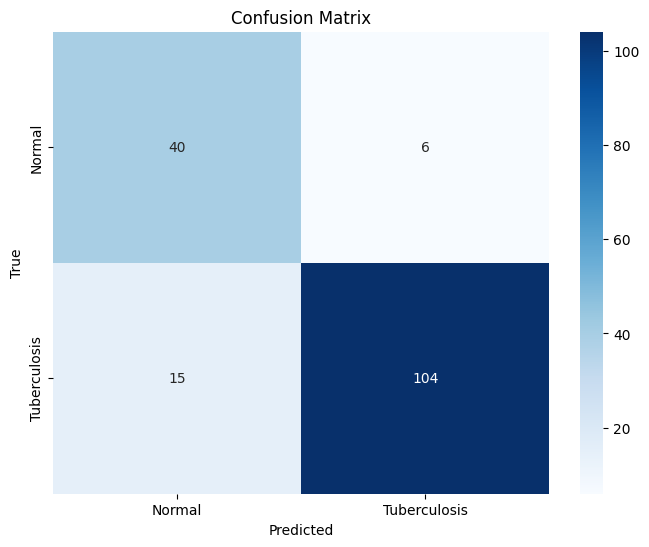

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Tuberculosis'], yticklabels=['Normal', 'Tuberculosis'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


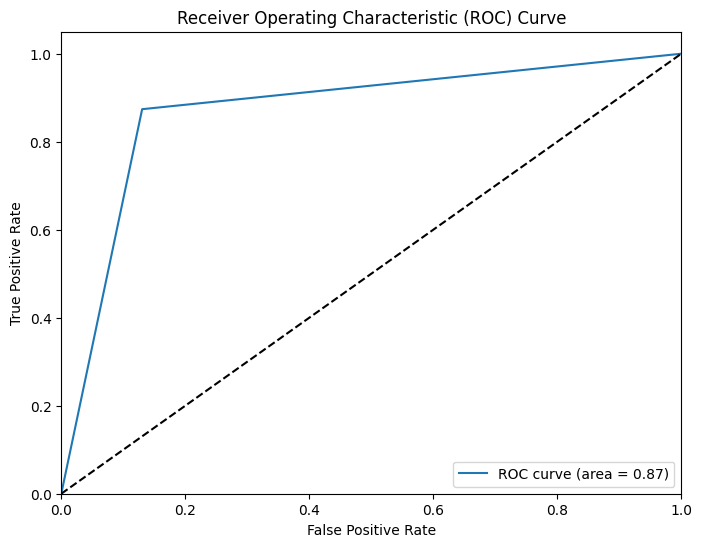

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

class_rep = classification_report(y_test, predictions, target_names=['Normal', 'Tuberculosis'])
print(class_rep)


              precision    recall  f1-score   support

      Normal       0.73      0.87      0.79        46
Tuberculosis       0.95      0.87      0.91       119

    accuracy                           0.87       165
   macro avg       0.84      0.87      0.85       165
weighted avg       0.88      0.87      0.88       165



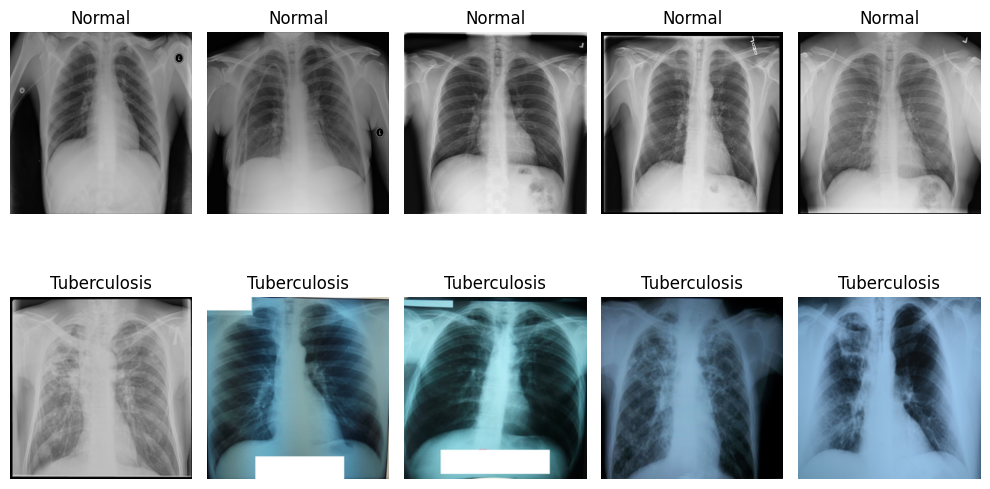

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Sample images from each class
num_samples = 5  # Number of samples to visualize
normal_samples = Normal[:num_samples]
tuberculosis_samples = Tuberculosis[:num_samples]

plt.figure(figsize=(10, 6))

# Visualize Normal images
for i, img_path in enumerate(normal_samples):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(img)
    plt.title("Normal")
    plt.axis('off')

# Visualize Tuberculosis images
for i, img_path in enumerate(tuberculosis_samples):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, num_samples, num_samples + i + 1)
    plt.imshow(img)
    plt.title("Tuberculosis")
    plt.axis('off')

plt.tight_layout()
plt.show()
